In [1]:
# This section performs an operation in the workflow
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# This section performs an operation in the workflow
!pip install -q tensorflow-datasets


In [3]:
# This section performs an operation in the workflow
import tensorflow_datasets as tfds
print("TFDS version:", tfds.__version__)


TFDS version: 4.9.9


In [4]:
# This section performs an operation in the workflow
(ds_train, ds_val), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    with_info=True,
    as_supervised=True
)

print("Number of classes:", ds_info.features['label'].num_classes)
print("Example classes:", ds_info.features['label'].names[:10])


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.T4A70I_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.T4A70I_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.
Number of classes: 101
Example classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [6]:
# This section performs an operation in the workflow
import tensorflow as tf

IMG_SIZE = 224       # image size for the model
BATCH_SIZE = 32      # number of samples per batch
AUTOTUNE = tf.data.AUTOTUNE


In [7]:
# This section performs an operation in the workflow
def preprocess(image, label):
    # resize image to 224x224
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # convert to float32 and normalize to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


In [8]:
# This section performs an operation in the workflow
train_ds = ds_train.map(preprocess, num_parallel_calls=AUTOTUNE)
val_ds   = ds_val.map(preprocess,   num_parallel_calls=AUTOTUNE)

train_ds = train_ds.shuffle(2000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds   = val_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [9]:
# This section performs an operation in the workflow
for images, labels in train_ds.take(1):
    print("Batch shape:", images.shape)
    print("Labels shape:", labels.shape)


Batch shape: (32, 224, 224, 3)
Labels shape: (32,)


In [10]:
# This section performs an operation in the workflow
from tensorflow.keras import layers, models


In [11]:
# This section performs an operation in the workflow
def create_baseline_cnn(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=101):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPool2D(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPool2D(),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [12]:
# This section performs an operation in the workflow
baseline_model = create_baseline_cnn()
baseline_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 101)            │        25,957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,809,573 (98.46 MB)

 Trainable params: 25,809,573 (98.46 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# This section performs an operation in the workflow
baseline_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
# This section performs an operation in the workflow
EPOCHS_BASELINE = 3  # for a quick test run

history_baseline = baseline_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_BASELINE
)


Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 216s 86ms/step - accuracy: 0.0182 - loss: 4.5823 - val_accuracy: 0.0668 - val_loss: 4.3222
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 253s 85ms/step - accuracy: 0.0444 - loss: 4.3759 - val_accuracy: 0.0913 - val_loss: 4.1244
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 202s 84ms/step - accuracy: 0.0651 - loss: 4.2270 - val_accuracy: 0.1197 - val_loss: 3.9481


In [15]:
# This section performs an operation in the workflow
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input


In [16]:
# This section performs an operation in the workflow
def preprocess_effnet(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)   # EfficientNet normalization
    return image, label


In [17]:
# This section performs an operation in the workflow
train_ds_eff = ds_train.map(preprocess_effnet, num_parallel_calls=AUTOTUNE)
val_ds_eff   = ds_val.map(preprocess_effnet,   num_parallel_calls=AUTOTUNE)

train_ds_eff = train_ds_eff.shuffle(2000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds_eff   = val_ds_eff.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [18]:
# This section performs an operation in the workflow
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False   # freeze base model for initial training

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(101, activation='softmax')(x)

effnet_model = tf.keras.Model(inputs, outputs)
effnet_model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [19]:
# This section performs an operation in the workflow
effnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
# This section performs an operation in the workflow
EPOCHS_EFF = 3  # quick test

history_effnet = effnet_model.fit(
    train_ds_eff,
    validation_data=val_ds_eff,
    epochs=EPOCHS_EFF
)


Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 258s 95ms/step - accuracy: 0.4203 - loss: 2.5029 - val_accuracy: 0.6812 - val_loss: 1.2124
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 195s 81ms/step - accuracy: 0.6070 - loss: 1.5277 - val_accuracy: 0.7046 - val_loss: 1.1002
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 205s 82ms/step - accuracy: 0.6283 - loss: 1.4344 - val_accuracy: 0.7118 - val_loss: 1.0588


In [21]:
# This section performs an operation in the workflow
# unfreeze the last layers of the base model
base_model.trainable = True

# we will fine-tune only the last 20 layers
for layer in base_model.layers[:-20]:
    layer.trainable = False

print("Number of trainable layers:", len([l for l in base_model.layers if l.trainable]))


Number of trainable layers: 20


In [22]:
# This section performs an operation in the workflow
effnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [23]:
# This section performs an operation in the workflow
EPOCHS_FINE = 2

history_fine = effnet_model.fit(
    train_ds_eff,
    validation_data=val_ds_eff,
    epochs=EPOCHS_FINE
)


Epoch 1/2
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 252s 93ms/step - accuracy: 0.5007 - loss: 2.0225 - val_accuracy: 0.6964 - val_loss: 1.1608
Epoch 2/2
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 236s 98ms/step - accuracy: 0.6027 - loss: 1.5458 - val_accuracy: 0.7196 - val_loss: 1.0509


In [24]:
# This section performs an operation in the workflow
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(title + " - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title + " - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


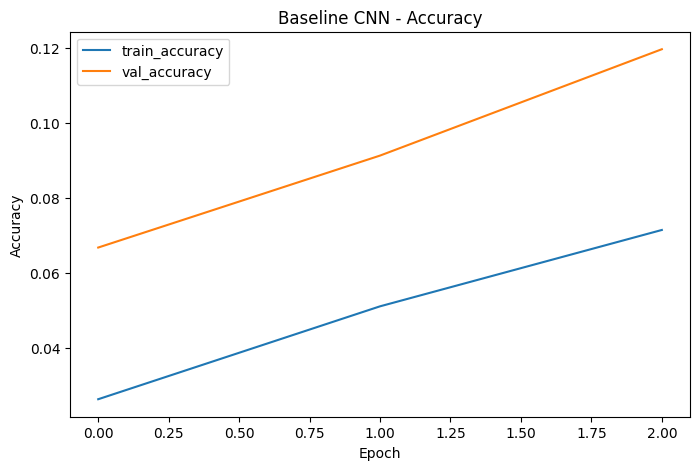

In [33]:
# This section performs an operation in the workflow
plt.figure(figsize=(8,5))
plt.plot(history_baseline.history['accuracy'], label='train_accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='val_accuracy')
plt.title("Baseline CNN - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("baseline_accuracy.png", dpi=300)
plt.show()


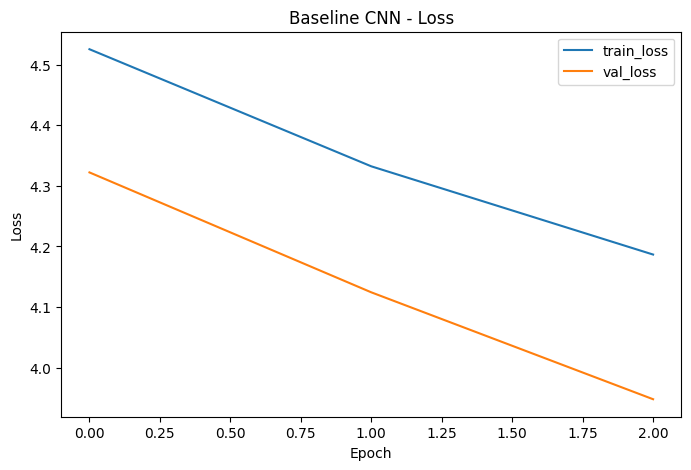

In [34]:
# This section performs an operation in the workflow
plt.figure(figsize=(8,5))
plt.plot(history_baseline.history['loss'], label='train_loss')
plt.plot(history_baseline.history['val_loss'], label='val_loss')
plt.title("Baseline CNN - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("baseline_loss.png", dpi=300)
plt.show()


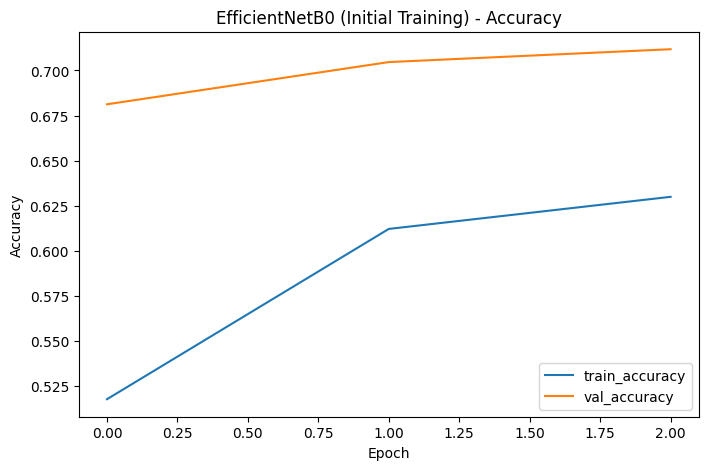

In [35]:
# This section performs an operation in the workflow
plt.figure(figsize=(8,5))
plt.plot(history_effnet.history['accuracy'], label='train_accuracy')
plt.plot(history_effnet.history['val_accuracy'], label='val_accuracy')
plt.title("EfficientNetB0 (Initial Training) - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("effnet_initial_accuracy.png", dpi=300)
plt.show()


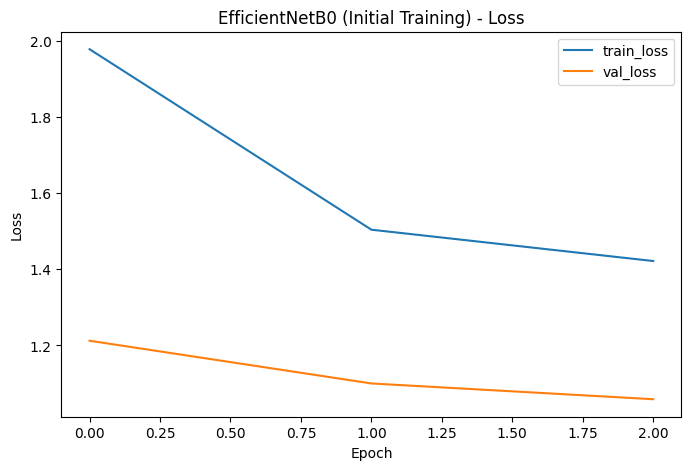

In [36]:
# This section performs an operation in the workflow
plt.figure(figsize=(8,5))
plt.plot(history_effnet.history['loss'], label='train_loss')
plt.plot(history_effnet.history['val_loss'], label='val_loss')
plt.title("EfficientNetB0 (Initial Training) - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("effnet_initial_loss.png", dpi=300)
plt.show()


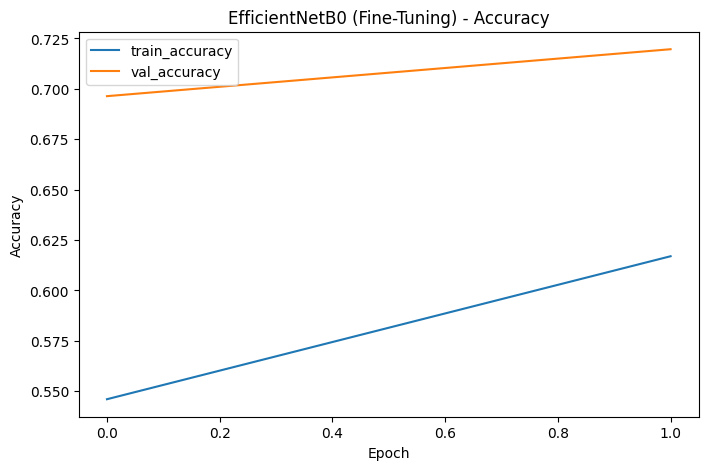

In [37]:
# This section performs an operation in the workflow
plt.figure(figsize=(8,5))
plt.plot(history_fine.history['accuracy'], label='train_accuracy')
plt.plot(history_fine.history['val_accuracy'], label='val_accuracy')
plt.title("EfficientNetB0 (Fine-Tuning) - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("effnet_fine_accuracy.png", dpi=300)
plt.show()


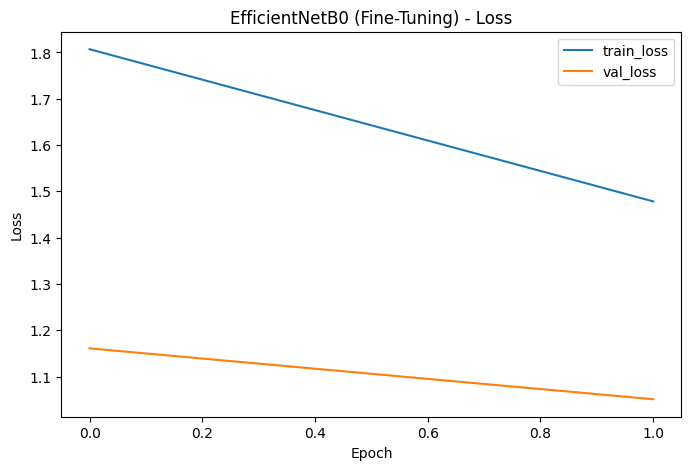

In [38]:
# This section performs an operation in the workflow
plt.figure(figsize=(8,5))
plt.plot(history_fine.history['loss'], label='train_loss')
plt.plot(history_fine.history['val_loss'], label='val_loss')
plt.title("EfficientNetB0 (Fine-Tuning) - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("effnet_fine_loss.png", dpi=300)
plt.show()


In [26]:
# This section performs an operation in the workflow
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds_eff:
    preds = effnet_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━

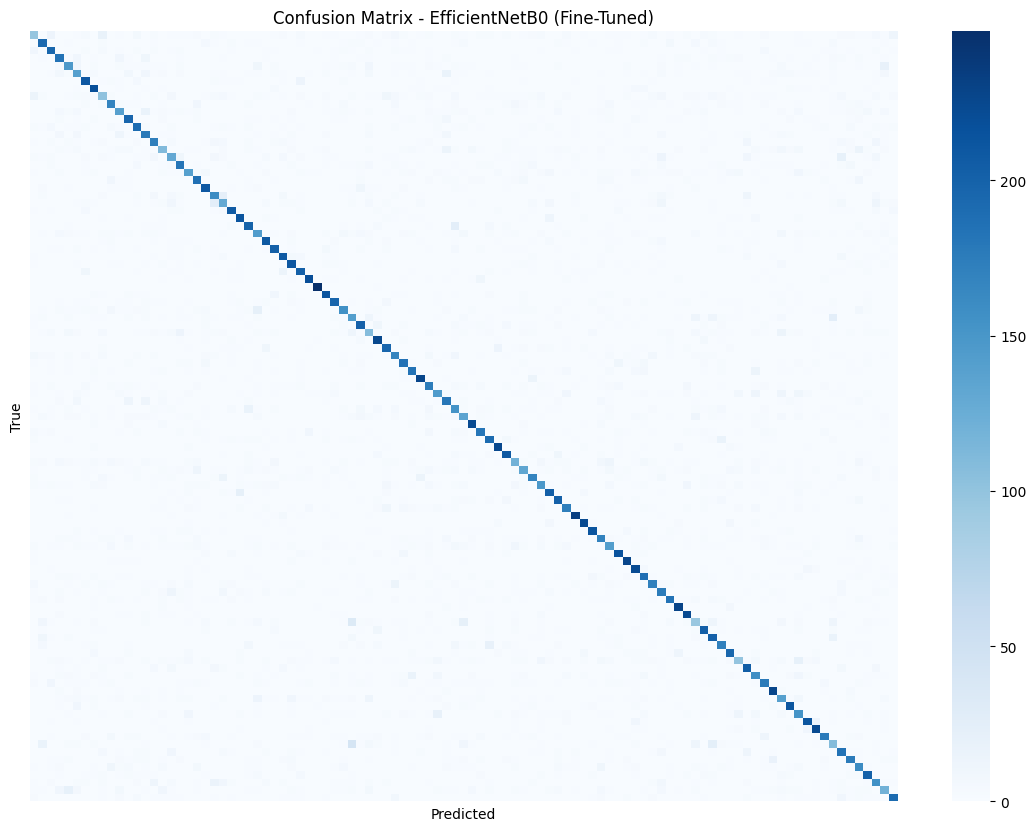

In [39]:
# This section performs an operation in the workflow
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(14,10))
sns.heatmap(cm, cmap="Blues", xticklabels=False, yticklabels=False)
plt.title("Confusion Matrix - EfficientNetB0 (Fine-Tuned)")
plt.xlabel("Predicted")
plt.ylabel("True")

# Save high-quality image
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()


In [ ]:
# This section performs an operation in the workflow
from google.colab import drive
drive.mount('/content/drive')

In [28]:
# This section performs an operation in the workflow
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, digits=4)
print(report)


              precision    recall  f1-score   support

           0     0.5568    0.3920    0.4601       250
           1     0.7273    0.7680    0.7471       250
           2     0.7443    0.7800    0.7617       250
           3     0.6790    0.7360    0.7063       250
           4     0.6447    0.5880    0.6151       250
           5     0.5691    0.5600    0.5645       250
           6     0.7664    0.8400    0.8015       250
           7     0.7649    0.8720    0.8150       250
           8     0.5455    0.4080    0.4668       250
           9     0.6914    0.6720    0.6815       250
          10     0.6465    0.5560    0.5978       250
          11     0.7127    0.7840    0.7467       250
          12     0.7451    0.7600    0.7525       250
          13     0.6544    0.7120    0.6820       250
          14     0.7238    0.6920    0.7076       250
          15     0.5781    0.4440    0.5023       250
          16     0.5882    0.5200    0.5520       250
          17     0.7082    

In [29]:
# This section performs an operation in the workflow
effnet_model.save("EfficientNet_Food101_Finetuned.h5")


In [41]:
# This section performs an operation in the workflow
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, digits=4)
print(report)

with open("classification_report.txt", "w") as f:
    f.write(report)


              precision    recall  f1-score   support

           0     0.5568    0.3920    0.4601       250
           1     0.7273    0.7680    0.7471       250
           2     0.7443    0.7800    0.7617       250
           3     0.6790    0.7360    0.7063       250
           4     0.6447    0.5880    0.6151       250
           5     0.5691    0.5600    0.5645       250
           6     0.7664    0.8400    0.8015       250
           7     0.7649    0.8720    0.8150       250
           8     0.5455    0.4080    0.4668       250
           9     0.6914    0.6720    0.6815       250
          10     0.6465    0.5560    0.5978       250
          11     0.7127    0.7840    0.7467       250
          12     0.7451    0.7600    0.7525       250
          13     0.6544    0.7120    0.6820       250
          14     0.7238    0.6920    0.7076       250
          15     0.5781    0.4440    0.5023       250
          16     0.5882    0.5200    0.5520       250
          17     0.7082    